# Data Science Regression Project: Predicting Survival of individaul in titanic

#### Supervised Machine Learning  Classification  Project

## Step 1: Data gathering

In [63]:
import pandas as pd

In [64]:
df=pd.read_csv('titanic.csv')

In [65]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

## Step 2: Feature Engineering

In [68]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
import seaborn as sns

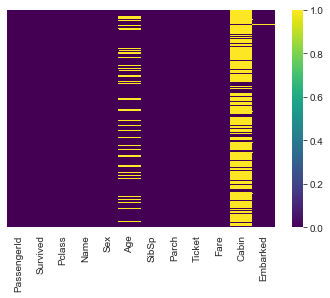

In [71]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

from above,There are 177 NAN values in Age columns  which is campararively(891) large in number hence neglecting thess rows may hamper the model hence we will look to fill this value.let's check the dependancy of age on other features. 

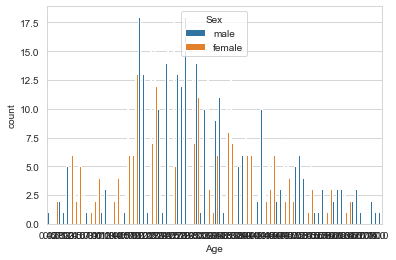

In [72]:
sns.countplot(x='Age',data=df,hue='Sex')

In [73]:
import matplotlib.pyplot as plt

In [74]:
%matplotlib inline

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

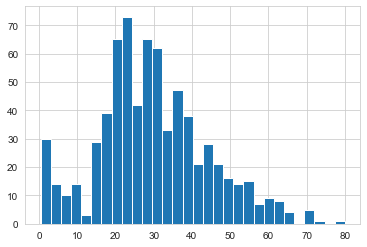

In [75]:
plt.hist(df.Age,bins=30)

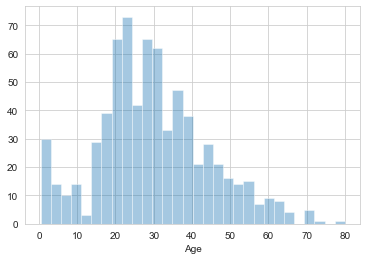

In [76]:
sns.set_style('whitegrid')
sns.distplot(df.Age.dropna(),kde=False,bins=30)

In [77]:
import cufflinks as cf
cf.go_offline()

In [78]:
df.Age.iplot(kind='hist',bins=30)

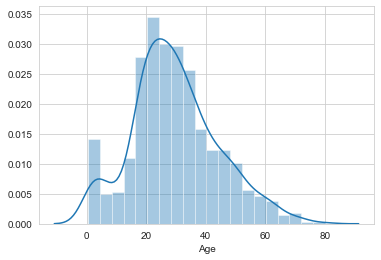

In [79]:
sns.distplot(df.Age)

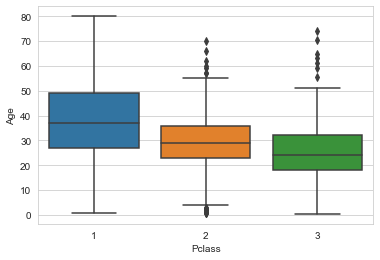

In [80]:
sns.boxplot(x='Pclass',y='Age',data=df)

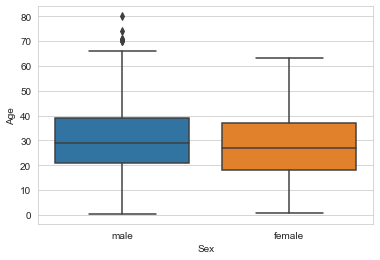

In [81]:
sns.boxplot(x='Sex',y='Age',data=df)

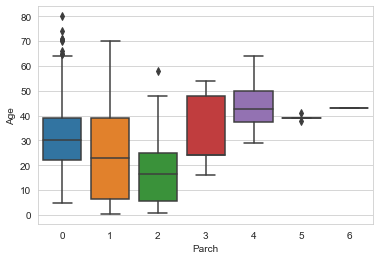

In [82]:
sns.boxplot(x='Parch',y='Age',data=df)

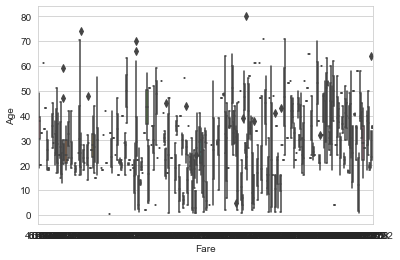

In [83]:
sns.boxplot(x='Fare',y='Age',data=df)

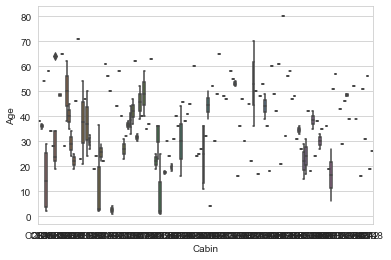

In [84]:
sns.boxplot(x='Cabin',y='Age',data=df)

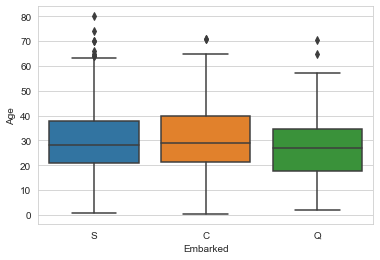

In [85]:
sns.boxplot(x='Embarked',y='Age',data=df)

From above all boxplot Age feature can be categorised on Pclass,Parch,Embarked.let's categorised Age feature according to Pclass.From box plot we will use following function to fill the NAN values of Ages.  

In [86]:
def featuring_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age

In [87]:
df.Age=df[['Age','Pclass']].apply(featuring_Age,axis=1)

In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the NAN values in Cabin feature are large in numberi.e. 687 campare to 891 and hence can't be predicted or fill.It's better to drop this feature. 

In [89]:
df.drop(['Cabin'],axis=1,inplace=True)

In [90]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Embarked feature is having only two NAN entries,let's drop these rows. 

In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have done with the data cleaning i.e. No NAN entries.

# DATA FEATURING

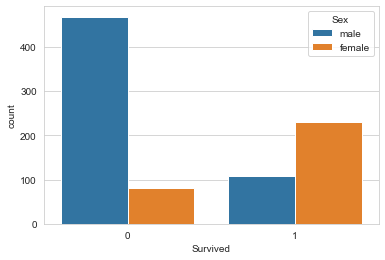

In [93]:
sns.countplot(x='Survived',data=df,hue='Sex')

In [94]:
df.Fare.iplot(kind='hist',bins=30)

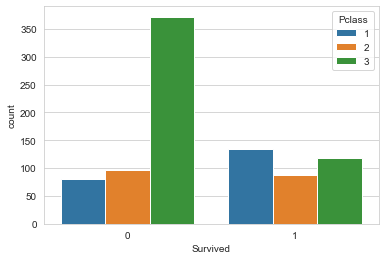

In [95]:
sns.countplot(x='Survived',data=df,hue='Pclass')

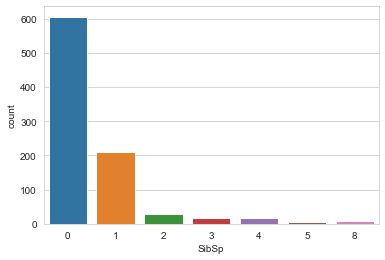

In [96]:
sns.countplot('SibSp',data=df)

(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

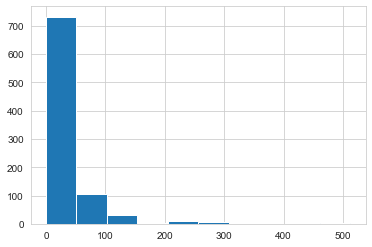

In [97]:
plt.hist(df.Fare)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Sex and Embarked feature is having categorical data hence to ease Machine Learning use OneHotEncoding . 

In [99]:
dummies_sex=pd.get_dummies(df.Sex)

In [100]:
dummies_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [101]:
dummies_Embarked=pd.get_dummies(df.Embarked)

In [102]:
dummies_Embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Merging these dummies with the df

In [103]:
df=pd.concat([df,dummies_sex,dummies_Embarked],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,1,0,0


Drop the Sex and Embarked columns.

In [104]:
df=df.drop(['Sex','Embarked'],axis=1)

PassengerId,Name and Ticket are not relevant to our target feature Survived hence Drop these columns.

In [105]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [106]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,-0.083730,0.083730,0.042585,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
female,0.541585,-0.127741,-0.083730,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
male,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
C,0.169966,-0.245733,0.042585,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261


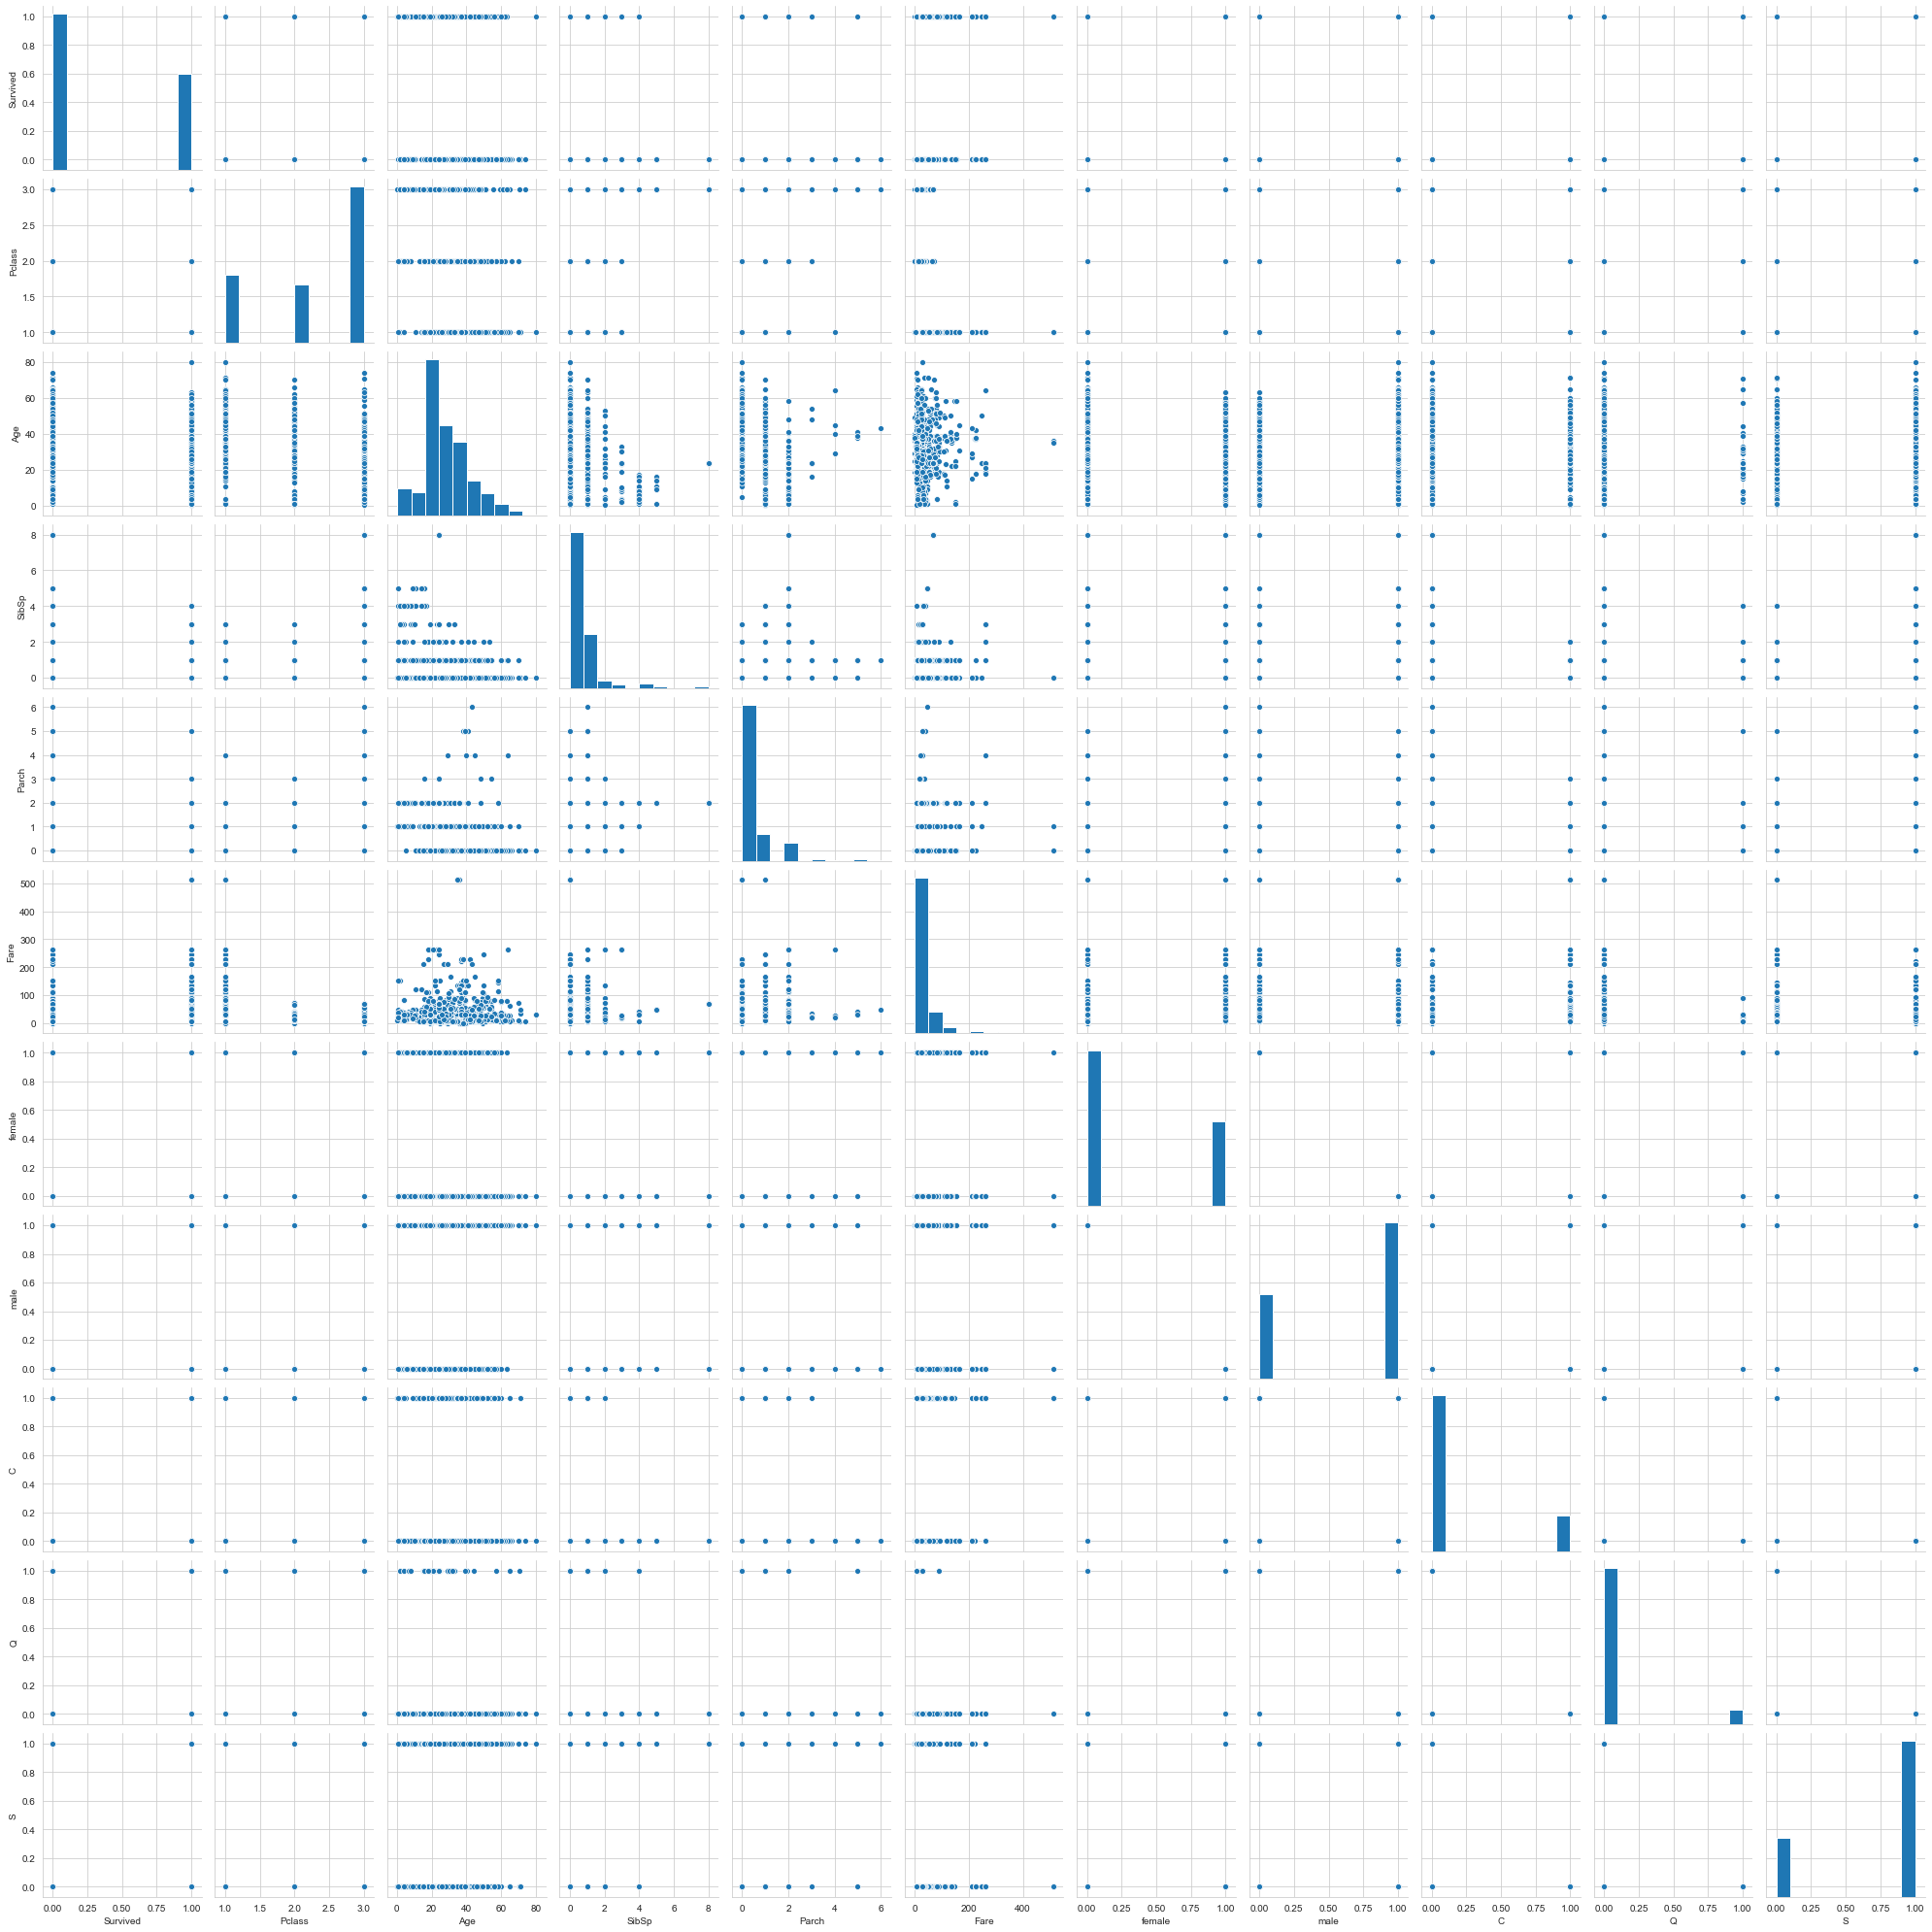

In [107]:
import seaborn as sns
sns.pairplot(df)

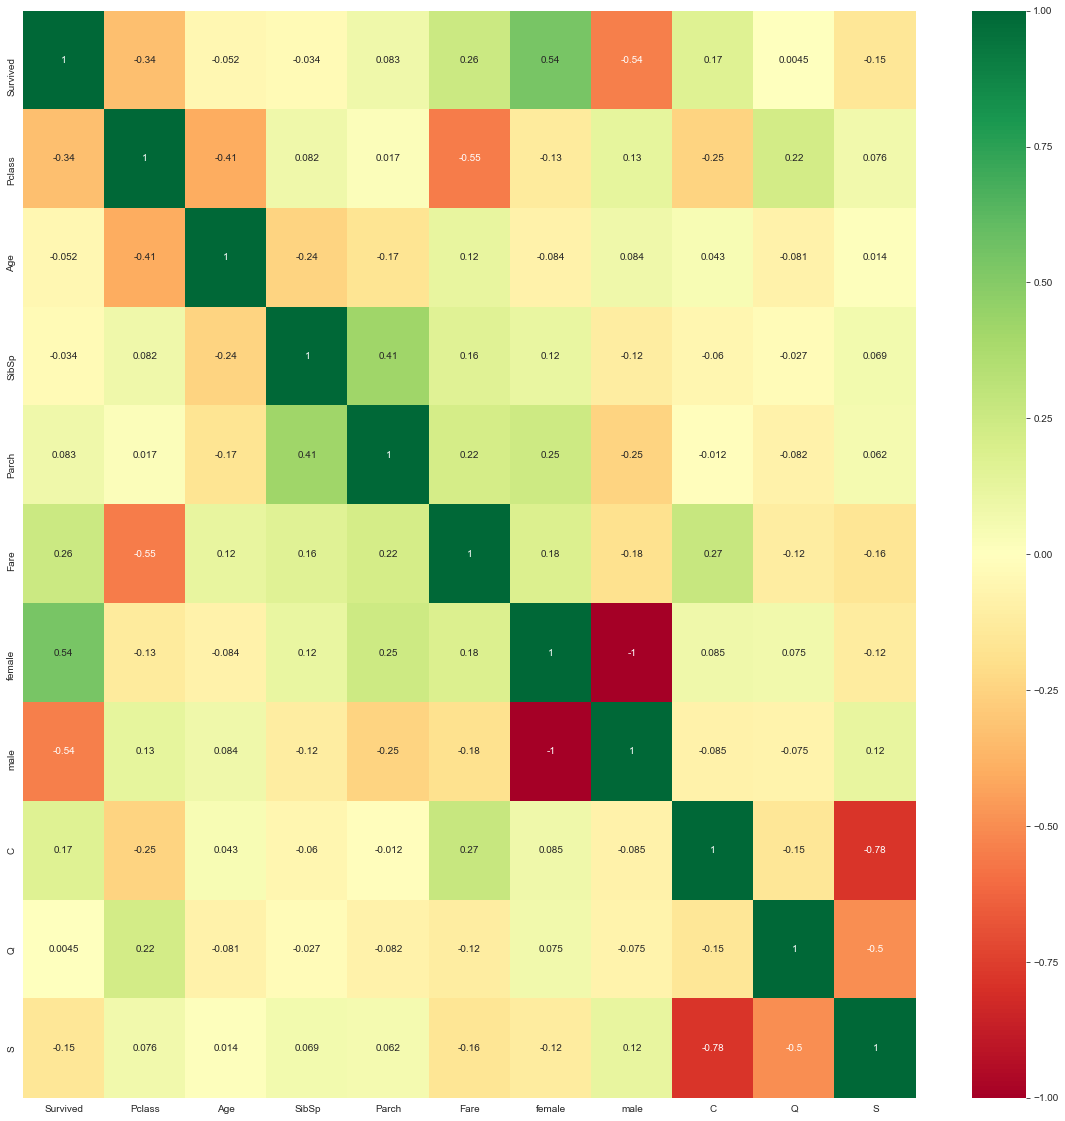

In [108]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [113]:
x=df.drop(['Survived'],axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [114]:
y=df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [115]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [116]:
print(model.feature_importances_)

[0.11169286 0.23441916 0.04440678 0.03706278 0.22787784 0.15061637
 0.15676398 0.00915076 0.00515047 0.022859  ]


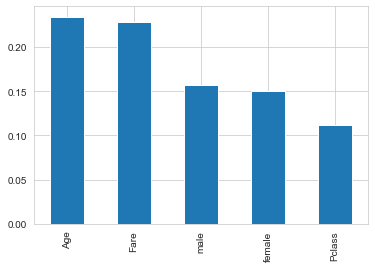

In [119]:
#plot graph of feature importances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='bar')

In [120]:
#we can consider only above five independent variable as this are most affecting variable on survival i.e. dependent variable.

# # Step 3:Training the Model

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [48]:
len(x_train)

711

### Linear regression model

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.3484079296219116

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_test,y_test)

C:\Users\Punam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7865168539325843

We are getting only 40% score by linear regression and 83% by logistic regression.
Let's apply cross validation for logistic regression to check the score of model (k_means clustering).

### Cross Validation For Logistic Regression 

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2)

cross_val_score(LogisticRegression(), x, y, cv=cv)

C:\Users\Punam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Punam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Punam\anaconda3\lib\site-packages

array([0.8258427 , 0.83146067, 0.82022472, 0.76966292, 0.84269663])

### use GridSearch cv to find the best model for this dataset

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [53]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        }, 
        'logisticregression': {
            'model':LogisticRegression(),
            'params': {
                'max_iter':[100,80]

            }
        },
          'svm': {
            'model':SVC(),
            'params': {
                'C':[1,10],
                'kernel':['rbf','linear']
            }
        },
       
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [54]:
find_best_model_using_gridsearchcv(x,y)

C:\Users\Punam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Punam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Punam\anaconda3\lib\site-packages

,model,best_score,best_params
0,linear_regression,0.362136,{'normalize': True}
1,logisticregression,0.794382,{'max_iter': 100}
2,svm,0.787640,"{'C': 1, 'kernel': 'linear'}"
3,decision_tree,0.162552,"{'criterion': 'mse', 'splitter': 'best'}"


From above dataframe we can coclude that the logistic regression is the best model for this titanic dataset

In [57]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q',
       'S'],
      dtype='object')

## Step 4: Testing The Model

The function use to predict survival of individual 

In [58]:
Accuracy=lg.score(x_test,y_test)
Accuracy

0.7865168539325843

In [59]:
predict=lg.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
cm

array([[94, 20],
       [18, 46]], dtype=int64)

Text(70.0, 0.5, 'Truth')

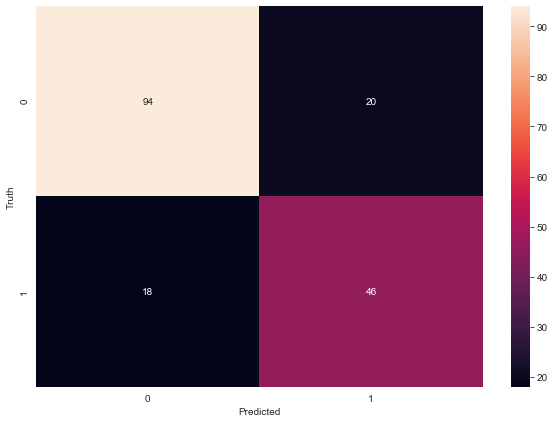

In [62]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import numpy as np
def predict_survival(Pclass, Age, SibSp, Parch, Fare,Sex,Embarked):    
    loc_index = np.where(x.columns==Embarked)[0][0]
    loc_index_male = np.where(x.columns==Sex)[0][0]

    m = np.zeros(len(x.columns))
    m[0] = Pclass
    m[1] =Age
    m[2] = SibSp
    m[3] = Parch
    m[4] = Fare
   
    
    if loc_index>0:
        m[loc_index] = 1
        
    if loc_index_male>0:
        m[loc_index_male]=1
    

    return lg.predict([m])[0]

In [ ]:
predict_survival(3,40,1,0,71,'male','Q')

In [ ]:
df

In [ ]:
predict_survival(1,38,1,0,71.28,'female','C')

In [ ]:
predict_survival(1,38,1,0,71.28,'male','C')

In [ ]:
predict_survival(1,38,1,0,71.28,'female','Q')

In [ ]:
predict_survival(1,38,1,0,71.28,'female','S')

## Step 5: Deployment of Model

Export the tested model to a pickle file

In [ ]:
import pickle
with open('Titanic_survival_model.pkl','wb') as t:
    pickle.dump(lg,t)

Export location and column information to a file that will be useful later on in our prediction application.

In [ ]:
import json
columns = {
    'x_columns': [col.lower() for col in x.columns]
}
with open('columns.json','w') as t:
    t.write(json.dumps(columns))

In [ ]:
predict_survival(1,38,1,0,71.28,'female','S')

In [ ]:
from flask import Flask, render_template, request
import jsonify
import requests
import pickle
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

def predict(Pclass,Age,SibSp,Parch,Fare,Sex,Embarked):
    
        m=np.zeros(10)
        m[0] = Pclass
        m[1]=Age
        m[2]=SibSp
        # Kms_Driven2=np.log(Kms_Driven)
        m[3]=Parch 
        m[4]=Fare
        Sex="Female"
        Embarked="S"
        if(Sex=='Female'):
                m[5]=1
                
        else:
                m[6]=1

        if(Embarked=='C'):
            m[7]=1
        elif(Embarked=='Q'):
            m[8]=1
        else:
            m[9]=1
        # Transmission_Mannual=request.form['Transmission_Mannual']
        # if(Transmission_Mannual=='Mannual'):
        #     Transmission_Mannual=1
        # else:
        #     Transmission_Mannual=0
        prediction=lg.predict([m])
        output=prediction
        # if output==0:
        #       return render_template('index.html',prediction_texts="The person did not Survived {}".format(output))
        # else:
        #       return render_template('index.html',prediction_texts="The person Survived{}".format(output))
        print(m)
        
        return output




In [ ]:
predict(1,38,1,0,71.28,'female','c')[0]

In [ ]:
predict(3,26,0,0,7.9250,'female','s')[0]